Adam Goldenberg
Computational Physics HW3
Python 3 Code

Problem 1, Inverse Power Distribution
Distribution given by: f(x) ∝ 1 /(1 + x)^n, with n > 1 and 0 < x < ∞

Part A: Normalize f(x) for a general n > 1 over the denoted x range.

See pdf for work. f(x) = - (1-n) / (1+x)^n

Part B: Derive the transformation x(r) where x is drawn from f(x) and r is drawn from a uniform distribution U(0,1). Note: just providing r(x) is unacceptable.

See pdf for work. x(r) = (1-r)^(1/(1-n)) -1

In [21]:
#Part C: Write a script that draws random x from this distribution. Make a plot with a curve for the distribution 
#and a histogram of 10,000 drawn values for n = 4. Does the histogram match the distribution f(x)?

import numpy as np
import matplotlib.pyplot as plt

def draw(n):
    r = np.random.random_sample()
    a = (1 - r)
    b = 1 / (1-n)
    a = a**b
    return a - 1

drawn = np.zeros(10000)
for i in range(0, 10000):
    drawn[i] = draw(4)

In [24]:
def function(x, n):
    a = 1 - n
    b = 1 + x
    b = b**n
    a = a / b
    return -1 * a

func = np.zeros(12)
for i in range(0, 12):
    func[i] = function(i, 4)

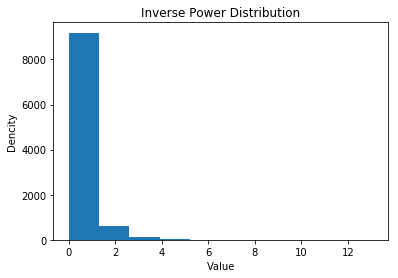

In [26]:
plt.title("Inverse Power Distribution")
plt.xlabel("Value")
plt.ylabel("Dencity")
plt.hist(drawn)
plt.show()



In [59]:
#Problem 2, Drunk on a vally/hill

import numpy as np
import matplotlib.pyplot as plt

#Part A: Write a script that that simulates a 1D random walk given k, where 0 < k < 1 equals the probability of 
#stepping one unit away from the origin and 1 − k is the probability of stepping one unit towards the origin. 
#Assume the origin as the start point. At the origin, set the left/right probabilities to be the same.

#Makes an array of boleans length equal to the number of steps with twards = false and away = true
def stepSetup(stepNum, k):
    step = np.random.random_sample(stepNum)
    left = np.ones(stepNum, dtype=bool)
    for i in range(0,stepNum):
        if(step[i] - k < 0):
            left[i] = False
        if(step[i] - k >= 0):
            left[i] = True
    return left

#Gives a boolean with right = true and left = false with equal probabilityes
def originStep():
    a = np.random.random_sample() - 0.5
    if(a < 0):
        return False
    if(a >= 0):
        return True

#Gives a random walk distance array
def randWalk(stepNum, k):
    walk = np.zeros(stepNum + 1, dtype=int)
    steps = stepSetup(stepNum, k)
    for i in range(0,stepNum):
        #Step for at the origin
        if(walk[i] == 0):
            if(originStep() == True):
                 walk[i+1] = 1
            else:
                walk[i+1] = -1
        #Step for non-origin
        else:
            #Step away from the origin
            if(steps[i] == True):
                if(walk[i] >= 0):
                    walk[i+1] = walk[i] + 1
                else:
                    walk[i+1] = walk[i] - 1
            #Step twards the origin
            else:
                if(walk[i] <= 0):
                    walk[i+1] = walk[i] + 1
                else:
                    walk[i+1] = walk[i] - 1
    return walk
    
#Part B: Simulate 1000 realizations of 10,000 steps for k = 0.25. Plot a histogram of the number of times each 
#location is reached, averaged over all realizations. Do the same for k = 0.5 and k = 0.75.

def walkAvr(k):
    #Origin is at 10000
    walkAve = np.zeros(20000, dtype=np.float64) #The average location count
    
    #i iterates over 1000 realizations of the random walks
    for i in range(0,1000):
        walk = randWalk(10000, k)
        for a in walk:
            walkAve[a + 10000] = walkAve[a + 10000] + 1
    
    walkAve = walkAve / 1000
    return walkAve

In [76]:
#The average locations reached for k = 0.25
walks = walkAvr(0.25)

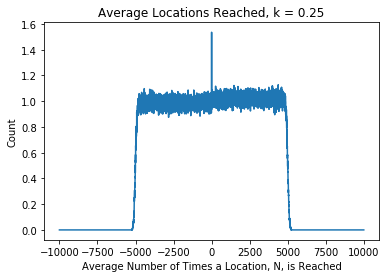

In [123]:
xRange = np.arange(-10000, 10000, dtype=int)
plt.title("Average Locations Reached, k = 0.25")
plt.xlabel("Average Number of Times a Location, N, is Reached")
plt.ylabel("Count")
plt.plot(xRange, walks)
plt.show()

In [81]:
#The average locations reached for k = 0.5
walks2 = walkAvr(0.5)

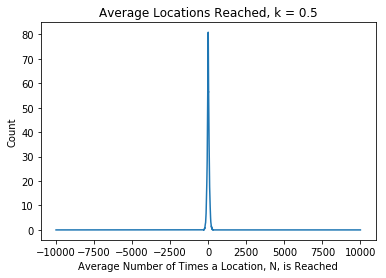

In [124]:
xRange = np.arange(-10000, 10000, dtype=int)
plt.title("Average Locations Reached, k = 0.5")
plt.xlabel("Average Number of Times a Location, N, is Reached")
plt.ylabel("Count")
plt.plot(xRange, walks2)
plt.show()

In [84]:
#The average locations reached for k = 0.75
walks3 = walkAvr(0.75)

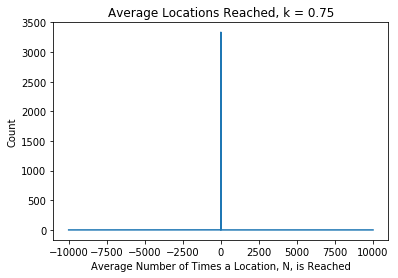

In [125]:
xRange = np.arange(-10000, 10000, dtype=int)
plt.title("Average Locations Reached, k = 0.75")
plt.xlabel("Average Number of Times a Location, N, is Reached")
plt.ylabel("Count")
plt.plot(xRange, walks3)
plt.show()

I was having problems with the histogram being readable given the range so for time purposes I made a different plot with the same information. The range is the farthest distance posible to travel in both directions. In all cases there is a drop off point where the average count of the locations reached goes to zero in the positive and negative directions. This means that there is a point where it becomes extremely unlikely to step past and the graph is symmetric (which makes sense as the chance to go left or right is equal). 

For k = 0.25, the average locations reached is uniform at a value of 1 between -5000 and 5000. There is a spike at location 0 which has a value of 1.5. All walks contain the location 0 because that is the point in which the walk starts so the average number of times the walk returns to 0 is 0.5. This is much lower then the non-zero locations around it, meaning that few walks return to 0.

For k = 0.5, the average locations reached forms a thin normal distribution around the point 0. This means that the walk rarely passes a few hundred steps away from the origin. The spike at the origin, even when accounting for the extra 1 count due to starting location, shows that the walk commonly returns and crosses over 0 around 80 times.

For k = 0.75, the graph becomes a spike at the point 0. This means that the walk rarely goes far away from 0 and the range of the graph makes it indistinguishable between the distance walked and 0. Instead, the walk crosses 0 repeatedly.

In [119]:
#Part C: For the same simulations, plot the rms distance away from the origin as a function of the number of steps
#N for k = 0.25, 0.5, and 0.75. Please comment on the trend. Is the rms distance proportional to N?

import math

def walkRMS(k):
    #Origin is at 10000
    walkAve = np.zeros(10001, dtype=np.float64) #The average location count
    
    #i iterates over 1000 realizations of the random walks
    for i in range(0,1000):
        walk = randWalk(10000, k)
        count = np.zeros(20000)
        for a in walk:
            count[a + 10000] = count[a + 10000] + 1
        for a in range(0,10000):
            b = (count[a] + count[19999 - a]) * (count[a] + count[19999 - a])
            walkAve[10000 - a] = (b) + walkAve[10000 - a]
        walkAve[0] = (count[10000] * count[10000]) + walkAve[0]
    
    for a in range(0,10000):
        walkAve[a] = math.sqrt(walkAve[a] / 10000)
    return walkAve

In [120]:
#Rms for k = 0.25
RMS25 = walkRMS(0.25)

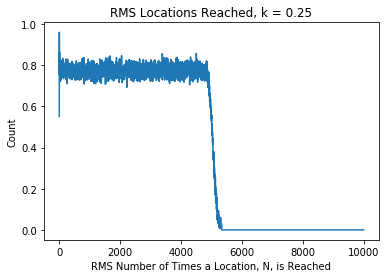

In [126]:
xRange = np.arange(0, 10001, dtype=int)
plt.title("RMS Locations Reached, k = 0.25")
plt.xlabel("RMS Number of Times a Location, N, is Reached")
plt.ylabel("Count")
plt.plot(xRange, RMS25)
plt.show()

In [129]:
#Rms for k = 0.50
RMS1 = walkRMS(0.50)

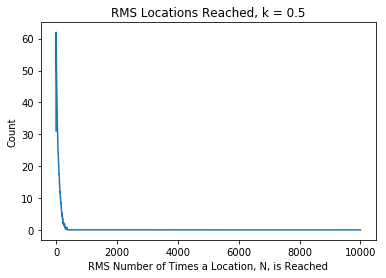

In [131]:
xRange = np.arange(0, 10001, dtype=int)
plt.title("RMS Locations Reached, k = 0.5")
plt.xlabel("RMS Number of Times a Location, N, is Reached")
plt.ylabel("Count")
plt.plot(xRange, RMS1)
plt.show()

In [122]:
#Rms for k = 0.75
RMS2 = walkRMS(0.75)

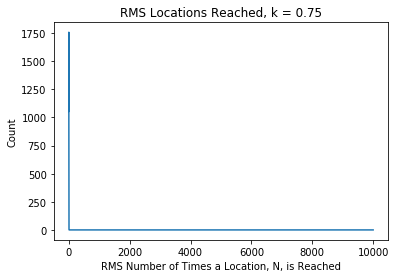

In [128]:
xRange = np.arange(0, 10001, dtype=int)
plt.title("RMS Locations Reached, k = 0.75")
plt.xlabel("RMS Number of Times a Location, N, is Reached")
plt.ylabel("Count")
plt.plot(xRange, RMS2)
plt.show()

The RMS graphs do not have a negative value, so the range is from 0 to the highest possible distance to walk, 10000. The trend tends to be constant and, at some point, the count goes to 0. Note that this has the same aspect where all walks contain at least one 0 because of the starting position. This is most notable in the k = 0.25 graph because others have high enogh peaks around 0 to make this less important.
For k = 0.25, we can see the drop-off is around 5000 like the average plot above. This tends to be constant around 0.8 before that point. The RMS count being below 1 means that most walks do not pass through the same position a lot.
For k = 0.5, we see the trends as the average plot above. The RMS counts being well above 1 means that positions are crossed by the walk repeatedly.
For k = 0.75, we can see the spike again as the decreased range is still to large to see the difference in values. The very high RMS count means that the 0 position is very common to return to. 

In [ ]:
#Part D: For values k = 0.2, 0.4, 0.6, and 0.8, find the probability of returning to the origin in less than 
#10,000 steps. Then try 1 million steps. Based on runs performed for very large numbers of steps, what do you 
#think the probability of returning to the origin is given an infinite number of steps for these 4 values of k?
#Is there a range of k values where the probability of returning to the origin after an infinite number 
#of step s less than 1? If so, please state the range.

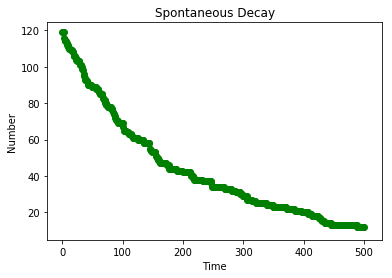

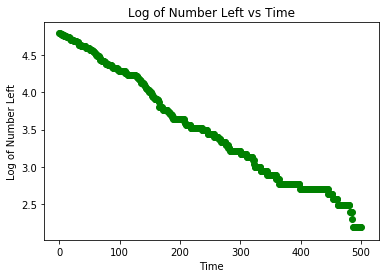

In [199]:
#Probelm 3: Decay Rates, Exercise in S4.6 in Landau.

import math
import numpy as np

#Write a program to simulate the radioactive decay using the simple program in Listing 4.2 as a guide. 
#You should obtain results like those in Figure 4.6

def decay(max):
    decayCon = 0.005
    timeMax = 500
    number = max
    nloop = max
    plt.figure(1)
    plt.title("Spontaneous Decay")
    plt.xlabel("Time")
    plt.ylabel("Number")
    
    for time in range(0, timeMax + 1):
        for atom in range(1, number + 1):
            decay = np.random.random_sample()
            if(decay < decayCon):
                nloop = nloop - 1
        number = nloop
        plt.scatter(time, number, c="green")
    plt.show()

decay(120)
    
#Part A: Plot the logarithm of the number left ln(N(t)) and the logarithm of the decay rate 
#ln ΔN(t)∕ Δt(=1) vs. time. Note that the simulation measures time in steps of Δt (generation number). 

def decayLogN(max):
    decayCon = 0.005
    timeMax = 500
    number = max
    nloop = max
    plt.figure(2)
    plt.title("Log of Number Left vs Time")
    plt.xlabel("Time")
    plt.ylabel("Log of Number Left")
    for time in range(0, timeMax + 1):
        for atom in range(1, number + 1):
            decay = np.random.random_sample()
            if(decay < decayCon):
                nloop = nloop - 1
        number = nloop
        plt.scatter(time, math.log(number), c="green")
    plt.show()

decayLogN(120)

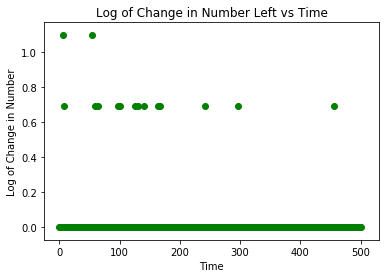

In [208]:
def decayLogChangeN(max):
    decayCon = 0.005
    timeMax = 500
    number = max
    nloop = max
    plt.figure(3)
    plt.title("Log of Change in Number Left vs Time")
    plt.xlabel("Time")
    plt.ylabel("Log of Change in Number")
    for time in range(0, timeMax + 1):
        for atom in range(1, number + 1):
            decay = np.random.random_sample()
            if(decay < decayCon):
                nloop = nloop - 1
        
        if(number - nloop != 0):
            plt.scatter(time, math.log(number - nloop), c="green")
        else:
            plt.scatter(time, 0, c="green")
        number = nloop
    plt.show()
    
decayLogChangeN(120)

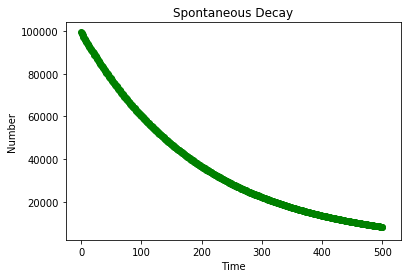

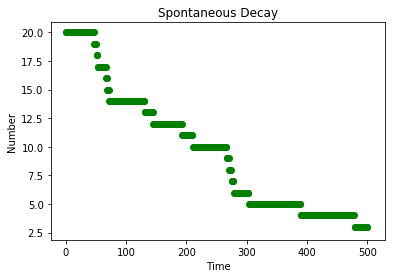

In [180]:
#Part B: Check that you obtain what looks like the exponential decay when you start with large values for 
#N(0), but that the decay displays its stochastic nature for small N(0). (Large N(0) values are also 
#stochastic; they just do not look like it.) 

decay(100000)
decay(20)

For a large initial N value, we can see that the curve is smoother. This is because the small differences from point to point is smaller and thus we do not see the randomness. For a smaller initial N value, we can see that the curve is choppier as the differences have a larger effect. This means that we can see that the amount of time till the next decrease in the number is random. 

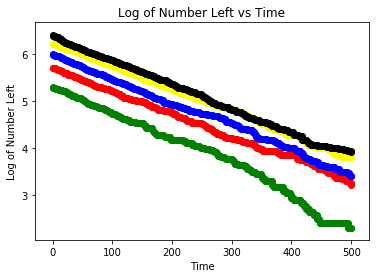

In [189]:
#Part C: Create two plots, one showing that the slopes of N(t) vs. t are independent of N(0) and another 
#showing that the slopes are proportional to the value chosen for λ.

def decayLogNMult():
    for i in range(0,5):
        decayCon = 0.005
        timeMax = 500
        max = (i + 2) * 100
        number = max
        nloop = max
        plt.figure(2)
        plt.title("Log of Number Left vs Time")
        plt.xlabel("Time")
        plt.ylabel("Log of Number Left")
        for time in range(0, timeMax + 1):
            for atom in range(1, number + 1):
                decay = np.random.random_sample()
                if(decay < decayCon):
                    nloop = nloop - 1
            number = nloop
            if(i == 0):
                plt.scatter(time, math.log(number), c="green")
            if(i == 1):
                plt.scatter(time, math.log(number), c="red")
            if(i == 2):
                plt.scatter(time, math.log(number), c="blue")
            if(i == 3):
                plt.scatter(time, math.log(number), c="yellow")
            if(i == 4):
                plt.scatter(time, math.log(number), c="black")
    plt.show()

decayLogNMult()


The log of N is used because it makes the slope of the graph a strait line. This uses multiple starting N values to generate 5 different lines witout changing other variables. We can see that the lines are all parallel within reason. Thus the slopes are independent of N.

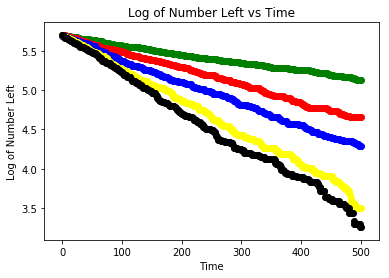

In [188]:
def decayLogNConst():
    for i in range(0,5):
        decayCon = (i + 1) * 0.001
        timeMax = 500
        max = 300
        number = max
        nloop = max
        plt.figure(2)
        plt.title("Log of Number Left vs Time")
        plt.xlabel("Time")
        plt.ylabel("Log of Number Left")
        for time in range(0, timeMax + 1):
            for atom in range(1, number + 1):
                decay = np.random.random_sample()
                if(decay < decayCon):
                    nloop = nloop - 1
            number = nloop
            if(i == 0):
                plt.scatter(time, math.log(number), c="green")
            if(i == 1):
                plt.scatter(time, math.log(number), c="red")
            if(i == 2):
                plt.scatter(time, math.log(number), c="blue")
            if(i == 3):
                plt.scatter(time, math.log(number), c="yellow")
            if(i == 4):
                plt.scatter(time, math.log(number), c="black")
    plt.show()
    
decayLogNConst()

This keeps a constant initial N value of 300 between the 5 graphs and instead varies the decay constants. Each of the lines have a different slope and as such, the slope is proportional to the decay constant. 

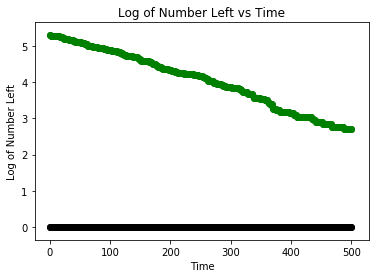

Green = N
Black = Change in N


In [212]:
#Part D: Create a plot showing that within the expected statistical variations, lnN(t) and lnΔN(t) are proportional.

def decayLogNChangeN(max):
    decayCon = 0.005
    timeMax = 500
    number = max
    nloop = max
    plt.figure(2)
    plt.title("Log of Number Left vs Time")
    plt.xlabel("Time")
    plt.ylabel("Log of Number Left")
    for time in range(0, timeMax + 1):
        for atom in range(1, number + 1):
            decay = np.random.random_sample()
            if(decay < decayCon):
                nloop = nloop - 1
        number = nloop
        
        if(number - nloop != 0):
            plt.scatter(time, math.log(number - nloop), c="black", label="N")
        else:
            plt.scatter(time, 0, c="black", label="Change in N")
        plt.scatter(time, math.log(number), c="green")
    plt.show()
    print("Green = N")
    print("Black = Change in N")
    
decayLogNChangeN(200)

The line for log of N is approximately strait and is decreasing. The log of the change in N is constantly at 0. The log of the change would be small because the log of 1 is 0 so there is some small constant change with each step in this graph. A constant change corresponds to the strait behavior of the log of N line.

Part E: Explain in your own words how a process that is spontaneous and random at its very heart can lead to the exponential decay.

An exponential decay happens when the rate of decrease in a number increases as the number increases. This is still true for a random prosses. All N of the atoms have a chance to decay and decrease N. Thus, if N is higher, then the chance that more atoms will decay will be higher.

Part F: How does your simulation show that the decay is exponential-like and not a power law such as N = βt^−α?

Exponential decay has the same amount of decrease each iteration. This can be seen in the graphs of spontaneous decay, but this is more obvious in the log of number left vs time graphs. For an exponential decay, the log graphs will be equal to a constant times x, which is a strait line. There is some variation because of the randomness but the lines are approximately strait for multiple starting N values and decay constants. For a power law, the log of the y variable is not strait. Thus, the simulation is an exponential decay.